In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

# The Quantum Rabi Model

In [116]:
# Operators
N = 10  # number of photons
sm = tensor(sigmam(), qeye(N))
a = tensor(qeye(2), destroy(N))

## The Hamiltonian

$$
H = \omega a^\dagger a + \omega \sigma^\dagger \sigma + g(a^\dagger + a)(\sigma_+ + \sigma_-)
$$

In [117]:
# Hamiltonian
g = 1
H = a.dag() * a + sm.dag() * sm + g * (a.dag() + a) * (sm + sm.dag())

In [118]:
# Initial state
psi0 = tensor(basis(2, 1), basis(N, 0))

Text(0, 0.5, 'Occupation probability')

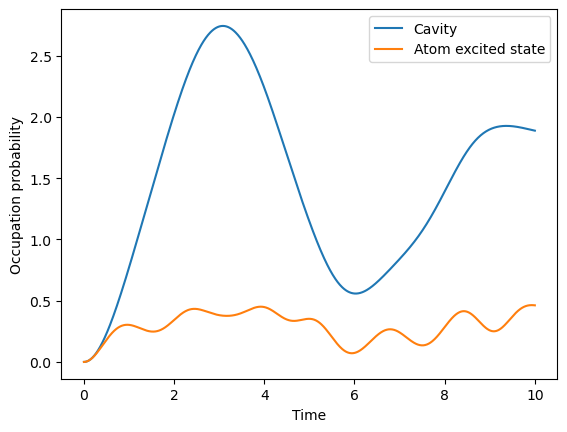

In [120]:
# Free evolution
tlist = np.linspace(0, 10, 1000)
result = mesolve(H, psi0, tlist, [], [a.dag() * a, sm.dag() * sm])

# Plot
plt.plot(tlist, result.expect[0], label="Cavity")
plt.plot(tlist, result.expect[1], label="Atom excited state")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Occupation probability")